# Data Science Tutorial

In [2]:
# Copy and extension of this tutorial: 
# https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb

## CRISP-DM

CRISP-DM is the standard process for data science projects.
Further details: https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining

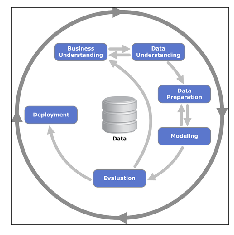

In [129]:
import cv2 
img = cv2.imread('images\\CRISP-DM_Process_Diagram1.png')
fig = plt.imshow(img[:,:,::-1])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

## Import dependencies

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Business Understanding

For the purposes of this exercise, let's pretend we're working for a startup that just got funded to create a smartphone app that automatically identifies species of flowers from pictures taken on the smartphone. We're working with a moderately-sized team of data scientists and will be building part of the data analysis pipeline for this app.

We've been tasked by our company's Head of Data Science to create a demo machine learning model that takes four measurements from the flowers (sepal length, sepal width, petal length, and petal width) and identifies the species based on those measurements alone.

## Data Understanding

In [89]:
iris = load_iris()
classes = ["iris-setosa", "iris-versicolor", "iris-virginica"]

iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

def get_class(index):
    return classes[int(index)]
iris_data["class"] = iris_data.target.apply(get_class)
iris_data.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0.0,iris-setosa
1,4.9,3.0,1.4,0.2,0.0,iris-setosa
2,4.7,3.2,1.3,0.2,0.0,iris-setosa
3,4.6,3.1,1.5,0.2,0.0,iris-setosa
4,5.0,3.6,1.4,0.2,0.0,iris-setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0,iris-versicolor
96,5.7,2.9,4.2,1.3,1.0,iris-versicolor
97,6.2,2.9,4.3,1.3,1.0,iris-versicolor
98,5.1,2.5,3.0,1.1,1.0,iris-versicolor


In [90]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


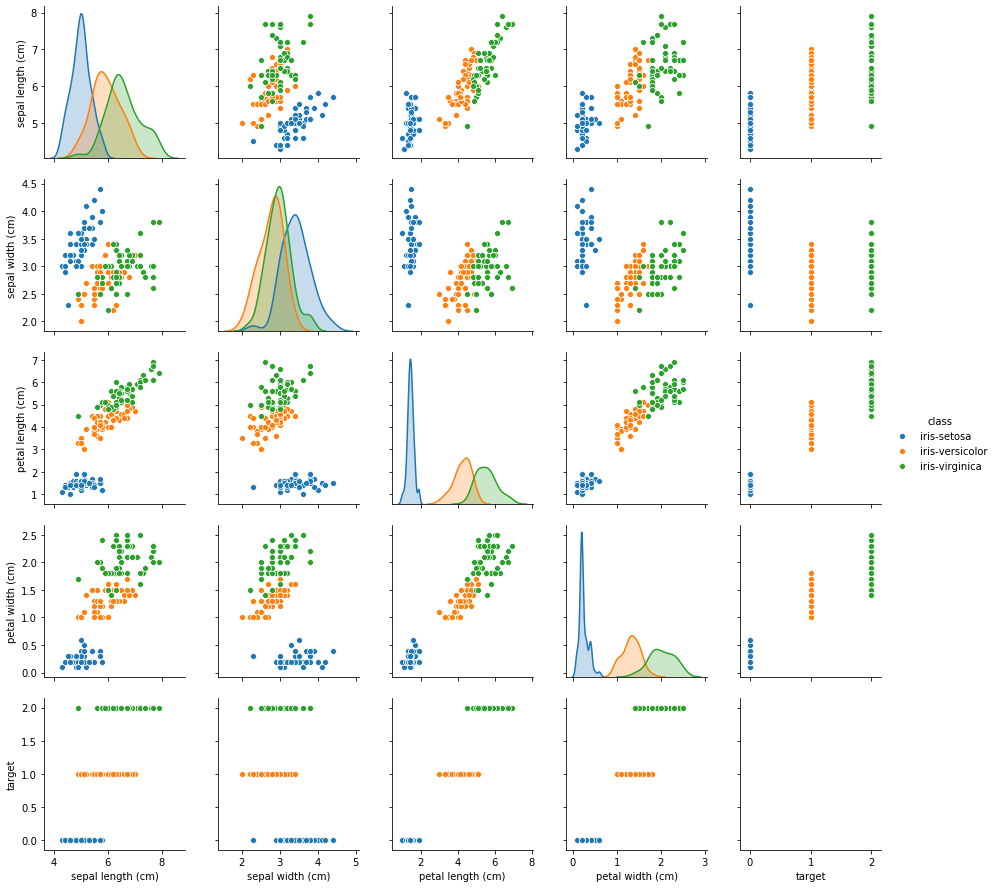

In [37]:
sns.pairplot(iris_data.dropna(), hue='class')

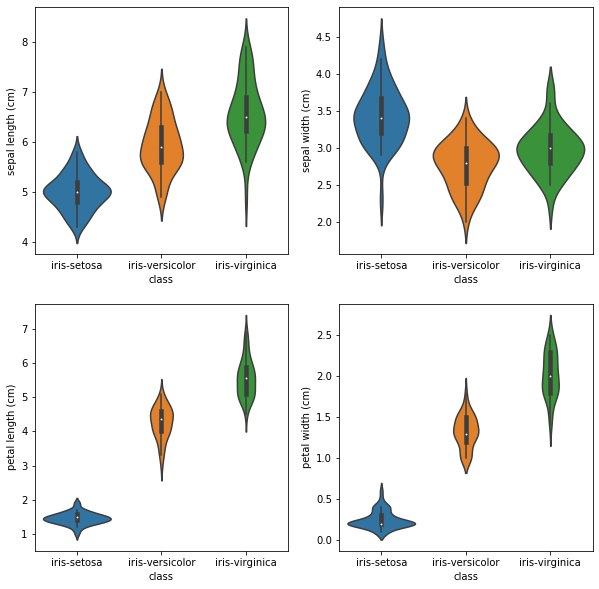

In [40]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data.columns):
    if column in ['class', 'target']:
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='class', y=column, data=iris_data)

## Prepare split dataset in input and target as well as training and test set

In [91]:
from sklearn.model_selection import train_test_split

all_inputs = iris_data[['sepal length (cm)', 'sepal width (cm)',
                             'petal length (cm)', 'petal width (cm)']].values

all_labels = iris_data['class'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

## Train a Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

[Text(133.92000000000002, 181.2, 'X[2] <= 2.45\ngini = 0.666\nsamples = 38\nvalue = [13, 12, 13]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 13\nvalue = [13, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 5.0\ngini = 0.499\nsamples = 25\nvalue = [0, 12, 13]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13]')]

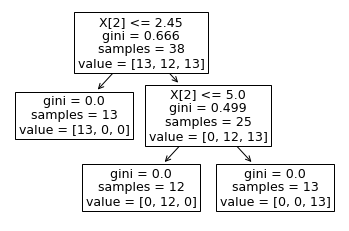

In [147]:
from sklearn.tree.export import export_graphviz
from sklearn import tree
tree.plot_tree(decision_tree_classifier.fit(testing_inputs, testing_classes)) 

In [155]:
out = StringIO()
out = export_graphviz(decision_tree_classifier, out_file='output\\tree.dot')

## Repeat classification with 1000 different splits

(array([  1.,   3.,   7.,  26.,   0.,  84., 187., 318., 287.,  87.]),
 array([0.78947368, 0.81052632, 0.83157895, 0.85263158, 0.87368421,
        0.89473684, 0.91578947, 0.93684211, 0.95789474, 0.97894737,
        1.        ]),
 <a list of 10 Patch objects>)

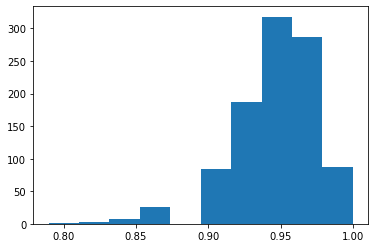

In [95]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)

## Use Cross-Validation Splits for the evaluation

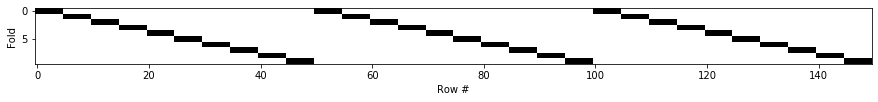

In [96]:
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

Text(0.5, 1.0, 'Average score: 0.96')

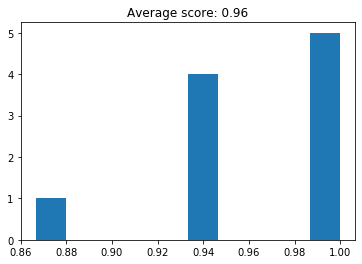

In [55]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [ ]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.tight_layout()

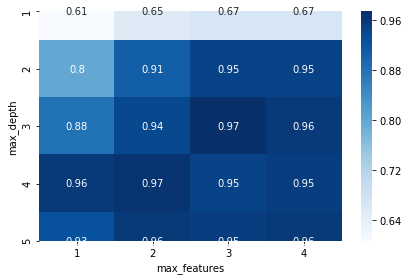

In [54]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.tight_layout()

# Hyperparameter Tuning with different model types

## Linear Regression

In [133]:
from sklearn import linear_model

# Create logistic regression
logistic = linear_model.LogisticRegression(max_iter=2000)

parameter_grid = {'C': np.logspace(0, 4, 10),
                  'penalty': ['l1', 'l2']}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(logistic,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           verbose=0)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_linear_regression = grid_search.best_estimator_
best_linear_regression

Best score: 0.98
Best parameters: {'C': 7.742636826811269, 'penalty': 'l1'}


LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=2000, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
best_linear_regression.coef_

array([[ 0.        ,  3.89257993, -4.35509907,  0.        ],
       [-0.05176053, -2.70089074,  1.12672944, -2.50796201],
       [-2.60047666, -3.6654724 ,  5.33493918,  8.79061113]])

In [140]:
np.round(best_linear_regression.predict_proba(testing_inputs),2)[0:4]

array([[0.  , 0.1 , 0.9 ],
       [0.87, 0.13, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.91, 0.09]])

## Decision Tree

In [97]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

Best score: 0.9733333333333334
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 2, 'splitter': 'best'}


## Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

random_forest_classifier = grid_search.best_estimator_
random_forest_classifier

Best score: 0.9666666666666667
Best parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 10}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Support Vector Machine

In [100]:
from sklearn import svm

clf = svm.SVC()

# Set the parameters by cross-validation
parameter_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
                  'gamma': [1e-3, 1e-4, 'scale', 'auto'],
                  'decision_function_shape': ['ovo'],
                  'C': [1, 4, 16, 64, 128, 265]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

support_vector_classifier = grid_search.best_estimator_
support_vector_classifier

Best score: 0.9866666666666667
Best parameters: {'C': 128, 'decision_function_shape': 'ovo', 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=128, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

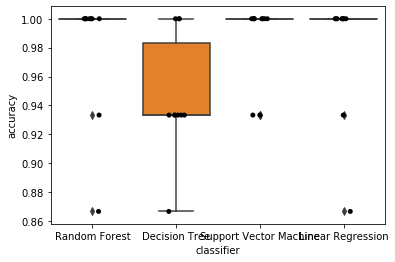

In [154]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
sv_df = pd.DataFrame({'accuracy': cross_val_score(support_vector_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Support Vector Machine'] * 10})
l_df = pd.DataFrame({'accuracy': cross_val_score(best_linear_regression, all_inputs, all_labels, cv=10),
                      'classifier': ['Linear Regression'] * 10})

all_df = pd.concat([rf_df, dt_df, sv_df, l_df], axis=0)
sns.boxplot(x='classifier', y='accuracy', data=all_df)
sns.stripplot(x='classifier', y='accuracy', data=all_df, jitter=True, color='black')